In [3]:
#for handling tabular dataset
import pandas as pd

In [4]:
import os

In [5]:
#for plotting and visualisation
import matplotlib.pyplot as plt

In [6]:
#for plotting and visualisation
import seaborn as sns

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
listings = pd.read_csv('listwithAvgRating.csv')

In [96]:
listings.head()

Unnamed: 0  listing_id                           listing_url     scrape_id  \
0           0    157612.0   https://www.airbnb.com/rooms/157612  2.020000e+13   
1           1   1241309.0  https://www.airbnb.com/rooms/1241309  2.020000e+13   
2           2   4468181.0  https://www.airbnb.com/rooms/4468181  2.020000e+13   
3           3    283495.0   https://www.airbnb.com/rooms/283495  2.020000e+13   
4           4   1329093.0  https://www.airbnb.com/rooms/1329093  2.020000e+13   

  last_scraped       source  \
0   27/03/2023  city scrape   
1   27/03/2023  city scrape   
2   27/03/2023  city scrape   
3   27/03/2023  city scrape   
4   27/03/2023  city scrape   

                                                name  \
0                 New attic space/single & Dble room   
1  ★Glass Roof★Walkable★Full Kitch★Office★Deck★Ga...   
2                    Double Room in shared apartment   
3                    En-suite room in detached house   
4                          Private B&B Double Room 2   

                                         description  \
0  The loft space is a small but cosy, private an...   
1  ✔︎Walk Score 75 (most errands can be accomplis...   
2  Close to Motorway links, free on street public...   
3  <b>The space</b><br />Double bedroom with King...   
4  <b>The space</b><br />Private Guest Rooms suit...   

                               neighborhood_overview  \
0  There is a public park within easy walking dis...   
1  You will find my personal recommendations in m...   
2                                                NaN   
3  The suburbaness of it all but 2 minutes from t...   
4                                                NaN   

                                         picture_url  ...  \
0  https://a0.muscache.com/pictures/18150718/745a...  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...  ...   
2  https://a0.muscache.com/pictures/5284eef5-392d...  ...   
3  https://a0.muscache.com/pictures/78775473/2d8f...  ...   
4  https://a0.muscache.com/pictures/a80681fd-9e4d...  ...   

   review_scores_location review_scores_value license instant_bookable  \
0                    4.66                4.92     NaN                f   
1                    4.00                4.00     NaN                f   
2                    3.67                5.00     NaN                f   
3                    4.80                5.00     NaN                f   
4                    4.81                4.61     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              3                                           3   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month compound_score  
0                                           0              0.91       0.897447  
1                                           0              0.06       0.877900  
2                                           0              0.05       0.764475  
3                                           0              0.10       0.966780  
4                                           0              3.54       0.745230  

[5 rows x 77 columns]

In [97]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4764 non-null   int64  
 1   listing_id                                    4764 non-null   float64
 2   listing_url                                   4764 non-null   object 
 3   scrape_id                                     4764 non-null   float64
 4   last_scraped                                  4764 non-null   object 
 5   source                                        4764 non-null   object 
 6   name                                          4764 non-null   object 
 7   description                                   4707 non-null   object 
 8   neighborhood_overview                         2593 non-null   object 
 9   picture_url                                   4764 non-null   o

DATA PRE-PROCESSING ---------- DATA CLEANING

1 ---   Remove Columns that are not relevant for Analysis

In [98]:
#Remove unnecessary columns
listings.drop(['listing_id','listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_verifications','neighbourhood','neighbourhood_cleansed','bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','calendar_updated','first_review','last_review','license','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','number_of_reviews_ltm','number_of_reviews_l30d'], axis=1, inplace=True)
listings.drop("Unnamed: 0", axis=1, inplace=True)

In [99]:
listings.head()

host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                  81%   
1     within an hour               100%                  53%   
2                NaN                NaN                  NaN   
3                NaN                NaN                 100%   
4                NaN                NaN                  NaN   

  host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                 t                          3                    t   
1                 t                          6                    t   
2                 f                          1                    t   
3                 f                          1                    t   
4                 f                          2                    t   

  host_identity_verified neighbourhood_group_cleansed  latitude  longitude  \
0                      t                      Salford  53.50114   -2.26429   
1                      t                     Trafford  53.42985   -2.34018   
2                      f                      Salford  53.48526   -2.34232   
3                      f                     Rochdale  53.56259   -2.21945   
4                      t                   Manchester  53.37601   -2.25162   

   ... review_scores_accuracy review_scores_cleanliness  \
0  ...                   4.93                      4.93   
1  ...                   5.00                      5.00   
2  ...                   4.25                      4.75   
3  ...                   5.00                      4.90   
4  ...                   4.69                      4.47   

   review_scores_checkin review_scores_communication  review_scores_location  \
0                   4.98                        4.94                    4.66   
1                   5.00                        5.00                    4.00   
2                   4.67                        4.75                    3.67   
3                   5.00                        5.00                    4.80   
4                   4.82                        4.76                    4.81   

   review_scores_value instant_bookable calculated_host_listings_count  \
0                 4.92                f                              1   
1                 4.00                f                              3   
2                 5.00                f                              1   
3                 5.00                f                              1   
4                 4.61                f                              1   

   reviews_per_month  compound_score  
0               0.91        0.897447  
1               0.06        0.877900  
2               0.05        0.764475  
3               0.10        0.966780  
4               3.54        0.745230  

[5 rows x 37 columns]

In [100]:
listings.isnull().sum()

host_response_time                468
host_response_rate                468
host_acceptance_rate              231
host_is_superhost                   0
host_total_listings_count           0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      8
bedrooms                          117
beds                               45
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
review_score

1A ------- Remove the "$" sign from the 'price' column

In [102]:
# Remove the "$" sign from the 'price' column
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '')
# Convert the 'price' column to numeric type (float)
listings['price'] = listings['price'].astype(float)

<ipython-input-102-fcc4c2317768>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '')


In [103]:
listings['price'].head()

0     41.0
1    100.0
2    100.0
3     75.0
4     31.0
Name: price, dtype: float64

In [104]:
#Fill the null values in bedrooms with mode since the mean value is greater than the mode
#(mode = 1 i.e. the value with most occurence)

listings['bedrooms'].fillna(listings['bedrooms'].mode().iloc[0], inplace=True)
listings['beds'].fillna(listings['beds'].mode().iloc[0], inplace=True)

In [105]:
#Fill null values in host_response_time with NIL
listings['host_response_time'].fillna('Nil', inplace=True) #copied from code
#Fill null values in host_response_rate with 0
listings['host_response_rate'].fillna('0%', inplace=True) #copied from code
#Fill null values in host_acceptance_rate with 0
listings['host_acceptance_rate'].fillna('0%', inplace=True) #copied from code

In [106]:
# Remove the "%" sign from the 'host_response_rate and host_acceptance_rate' columns
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').str.replace(',', '')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').str.replace(',', '')
# Convert the 'host_response_rate and host_acceptance_rate' column to numeric type (float)
listings['host_response_rate'] = listings['host_response_rate'].astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype(float)

1 -------- Drop rows with 0 number_of_reviews cos the null values in the other review parameters are from the 0 review rows.

In [107]:
listings = listings.dropna(subset=['number_of_reviews'])  # Drop rows with Null/NaN/MissingValue in 'number_of_reviews'
listings = listings[listings['number_of_reviews'] != 0]       # Drop rows where 'number_of_reviews' is 0

In [108]:
listings = listings.dropna(subset=['review_scores_accuracy'])  # Drop rows with NaN in 'review_scores_accuracy'
listings = listings.dropna(subset=['review_scores_cleanliness'])  # Drop rows with NaN in 'review_scores_cleanliness'

In [109]:
listings['bathrooms_text'] = listings['bathrooms_text'].str.extract('(\d+(?:\.\d+)?)')
listings['bathrooms_text'] = pd.to_numeric(listings['bathrooms_text'], errors='coerce')
#Fill null values in bathroom_text with 0 before the removal of text
listings['bathrooms_text'].fillna(0, inplace=True) #copied from code

In [110]:
listings['bathrooms_text'].value_counts() # check, there's presence of outlier (27 bathrooms)

1.0     2384
2.0      640
1.5      615
2.5      170
3.0       98
3.5       34
0.0       34
4.0       19
4.5        6
5.0        6
5.5        3
6.0        3
27.0       1
6.5        1
Name: bathrooms_text, dtype: int64

In [111]:
listings.isnull().sum()

host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy      

In [112]:
print("The dataset has {} rows and {} columns after being preprocessed.".format(*listings.shape))

The dataset has 4014 rows and 37 columns after being preprocessed.


In [113]:
listings.describe().T

count        mean          std       min  \
host_response_rate              4014.0   88.030394    29.828909   0.00000   
host_acceptance_rate            4014.0   88.227703    23.472003   0.00000   
host_total_listings_count       4014.0   58.625561   507.686742   1.00000   
latitude                        4014.0   53.477546     0.047987  53.33568   
longitude                       4014.0   -2.251671     0.094151  -2.71227   
accommodates                    4014.0    3.754111     2.599733   1.00000   
bathrooms_text                  4014.0    1.401470     0.765289   0.00000   
bedrooms                        4014.0    1.731938     1.178295   1.00000   
beds                            4014.0    2.249875     1.920185   1.00000   
price                           4014.0  128.503239  1086.728141  12.00000   
minimum_nights                  4014.0    4.698057    33.664792   1.00000   
maximum_nights                  4014.0  583.247633   464.497364   1.00000   
availability_30                 4014.0   13.738166    10.502285   0.00000   
availability_60                 4014.0   31.300199    20.630150   0.00000   
availability_90                 4014.0   48.822870    30.068354   0.00000   
availability_365                4014.0  193.009965   129.937350   0.00000   
number_of_reviews               4014.0   39.120329    74.542965   1.00000   
review_scores_rating            4014.0    4.672028     0.468299   1.00000   
review_scores_accuracy          4014.0    4.728582     0.441257   1.00000   
review_scores_cleanliness       4014.0    4.648034     0.505694   1.00000   
review_scores_checkin           4014.0    4.775082     0.420976   1.00000   
review_scores_communication     4014.0    4.791338     0.406040   1.00000   
review_scores_location          4014.0    4.695065     0.412033   1.00000   
review_scores_value             4014.0    4.620309     0.485850   1.00000   
calculated_host_listings_count  4014.0    7.595665    12.716452   1.00000   
reviews_per_month               4014.0    1.623560     1.767020   0.01000   
compound_score                  4014.0    0.786446     0.114877  -0.96230   

                                       25%         50%          75%  \
host_response_rate               97.000000  100.000000   100.000000   
host_acceptance_rate             89.000000   98.000000   100.000000   
host_total_listings_count         2.000000    4.000000    15.000000   
latitude                         53.452345   53.478535    53.491743   
longitude                        -2.281627   -2.241179    -2.215102   
accommodates                      2.000000    3.000000     5.000000   
bathrooms_text                    1.000000    1.000000     1.500000   
bedrooms                          1.000000    1.000000     2.000000   
beds                              1.000000    2.000000     3.000000   
price                            48.000000   80.000000   120.000000   
minimum_nights                    1.000000    2.000000     3.000000   
maximum_nights                  100.000000  365.000000  1125.000000   
availability_30                   3.000000   14.000000    23.000000   
availability_60                  13.000000   35.000000    49.000000   
availability_90                  24.000000   55.000000    75.000000   
availability_365                 70.000000  187.000000   325.000000   
number_of_reviews                 4.000000   14.000000    41.000000   
review_scores_rating              4.560000    4.800000     4.980000   
review_scores_accuracy            4.670000    4.870000     5.000000   
review_scores_cleanliness         4.500000    4.800000     5.000000   
review_scores_checkin             4.750000    4.920000     5.000000   
review_scores_communication       4.750000    4.930000     5.000000   
review_scores_location            4.600000    4.800000     4.950000   
review_scores_value               4.500000    4.750000     4.920000   
calculated_host_listings_count    1.000000    2.000000     7.000000   
reviews_per_month             

In [114]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4014 entries, 0 to 4750
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              4014 non-null   object 
 1   host_response_rate              4014 non-null   float64
 2   host_acceptance_rate            4014 non-null   float64
 3   host_is_superhost               4014 non-null   object 
 4   host_total_listings_count       4014 non-null   int64  
 5   host_has_profile_pic            4014 non-null   object 
 6   host_identity_verified          4014 non-null   object 
 7   neighbourhood_group_cleansed    4014 non-null   object 
 8   latitude                        4014 non-null   float64
 9   longitude                       4014 non-null   float64
 10  property_type                   4014 non-null   object 
 11  room_type                       4014 non-null   object 
 12  accommodates                    40

In [115]:
data = listings

EXPLORATORY DATA  ANALYSIS (EDA)

OUTLIERS VISUALISATION

In [116]:
#Since price is our target variable, let us explore price
data['price'].describe()

count     4014.000000
mean       128.503239
std       1086.728141
min         12.000000
25%         48.000000
50%         80.000000
75%        120.000000
max      66398.000000
Name: price, dtype: float64

<ipython-input-29-1cf977298d67>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<function matplotlib.pyplot.show(close=None, block=None)>

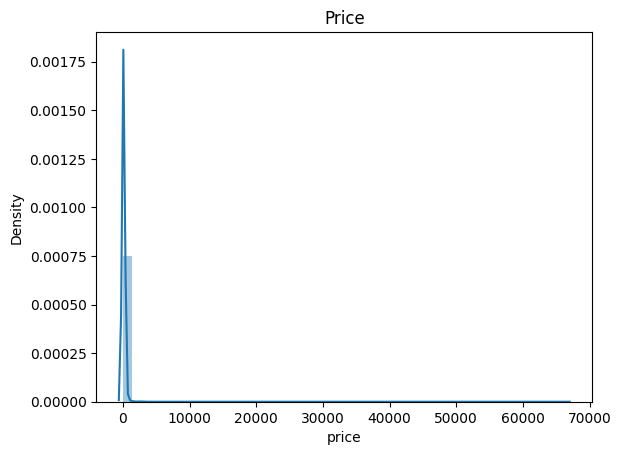

In [29]:
sns.distplot(data['price'])
plt.title("Price")
plt.show

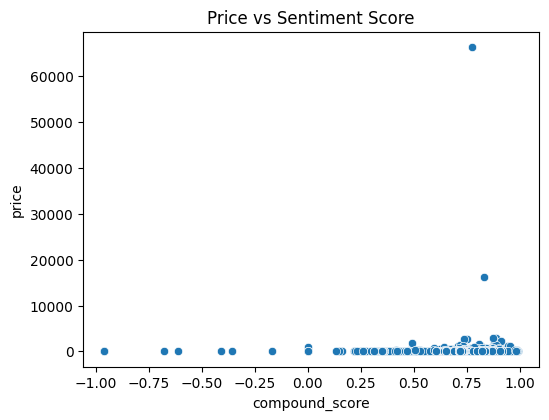

In [30]:
#Checking if there is any relationship between
#price and review score

plt.figure(figsize=(20,20))

plt.subplot(4, 3, 1)
sns.scatterplot(data =data, x="compound_score", y="price")
plt.title("Price vs Sentiment Score")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

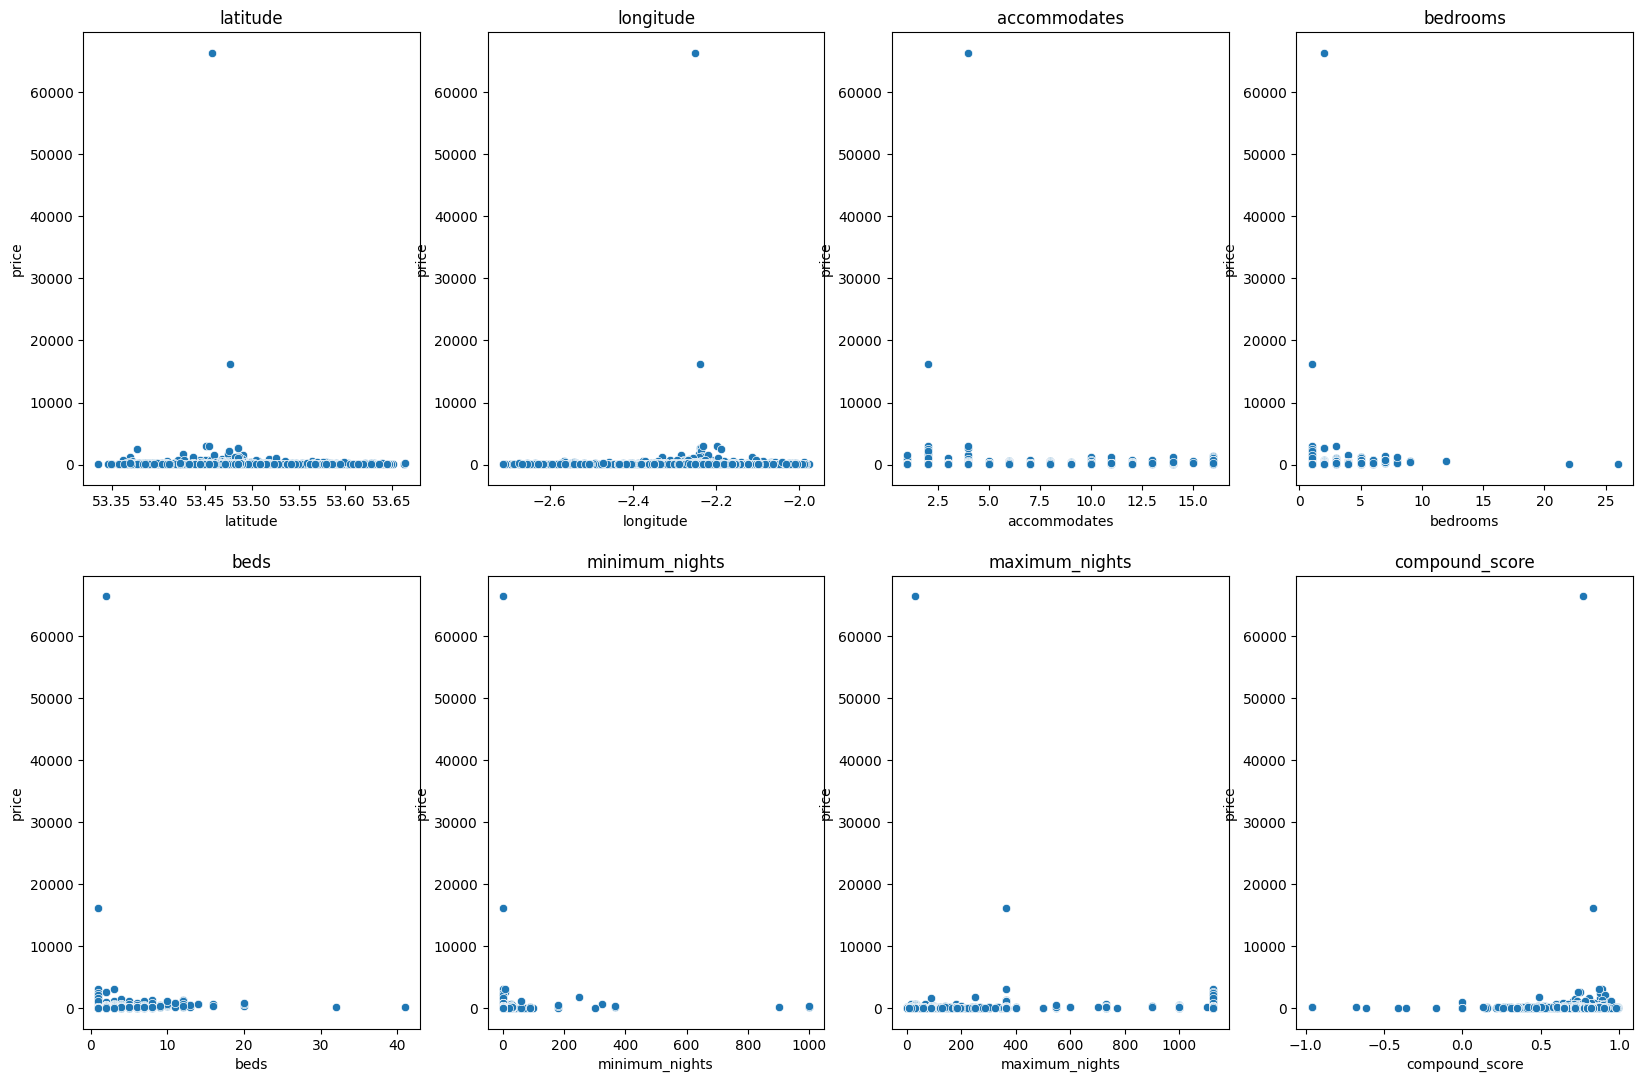

In [31]:
#Plot Price againt different features to check for Correlation

plt.figure(figsize=(20,20))

plt.subplot(3, 4, 1)
sns.scatterplot(data =data, x="latitude", y="price")
plt.title("latitude")

plt.subplot(3, 4, 2)
sns.scatterplot(data =data, x="longitude", y="price")
plt.title("longitude")

plt.subplot(3, 4, 3)
sns.scatterplot(data =data, x="accommodates", y="price")
plt.title("accommodates")

plt.subplot(3, 4, 4)
sns.scatterplot(data =data, x="bedrooms", y="price")
plt.title("bedrooms")

plt.subplot(3, 4, 5)
sns.scatterplot(data =data, x="beds", y="price")
plt.title("beds")

plt.subplot(3, 4, 6)
sns.scatterplot(data =data, x="minimum_nights", y="price")
plt.title('minimum_nights')

plt.subplot(3, 4, 7)
sns.scatterplot(data =data, x="maximum_nights", y="price")
plt.title("maximum_nights")

plt.subplot(3, 4, 8)
sns.scatterplot(data =data, x="compound_score", y="price")
plt.title('compound_score')

plt.show

In [117]:
#Numeric columns to perform outlier operations on
numeric_columns = ['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates','bathrooms_text','bedrooms','beds','price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']

In [118]:
data2 = data[numeric_columns]

In [119]:
data2

host_response_rate  host_acceptance_rate  host_total_listings_count  \
0                  100.0                  81.0                          3   
1                  100.0                  53.0                          6   
2                    0.0                   0.0                          1   
3                    0.0                 100.0                          1   
4                    0.0                   0.0                          2   
...                  ...                   ...                        ...   
4727               100.0                 100.0                          1   
4742               100.0                  98.0                          7   
4744               100.0                  98.0                          7   
4745               100.0                  98.0                          7   
4750               100.0                 100.0                          1   

      accommodates  bathrooms_text  bedrooms  beds  price  minimum_nights  \
0                3             1.5       2.0   2.0   41.0               2   
1                4             1.0       2.0   3.0  100.0               7   
2                1             1.0       1.0   1.0  100.0               2   
3                2             1.0       1.0   1.0   75.0             100   
4                2             1.0       1.0   1.0   31.0               1   
...            ...             ...       ...   ...    ...             ...   
4727             2             1.0       1.0   1.0   56.0               1   
4742             2             1.0       1.0   1.0   25.0               1   
4744             2             1.0       1.0   1.0   44.0               1   
4745             2             1.5       1.0   1.0   31.0               1   
4750             4             1.0       1.0   2.0   75.0               2   

      maximum_nights  ...  number_of_reviews  review_scores_rating  \
0                365  ...                123                  4.92   
1                365  ...                  1                  5.00   
2                 14  ...                  4                  4.75   
3               1125  ...                 10                  5.00   
4                 30  ...                388                  4.49   
...              ...  ...                ...                   ...   
4727             365  ...                  2                  5.00   
4742             365  ...                  2                  5.00   
4744             365  ...                  1                  5.00   
4745             365  ...                  1                  5.00   
4750              90  ...                  1                  5.00   

      review_scores_accuracy  review_scores_cleanliness  \
0                       4.93                       4.93   
1                       5.00                       5.00   
2                       4.25                       4.75   
3                       5.00                       4.90   
4                       4.69                       4.47   
...                      ...                        ...   
4727                    5.00                       5.00   
4742                    5.00                       5.00   
4744                    5.00                       5.00   
4745                    5.00                       5.00   
4750                    5.00                       5.00   

      review_scores_checkin  review_scores_communication  \
0                      4.98                         4.94   
1                      5.00                         5.00   
2                      4.67                         4.75   
3                      5.00                         5.00   
4                      4.82                         4.76   
...                     ...                          ...   
4727                   5.00                         5.00   
4742                   5.00                         4.50   
4744                   5.00                         5.00   
4745  

OUTLIER TREATING

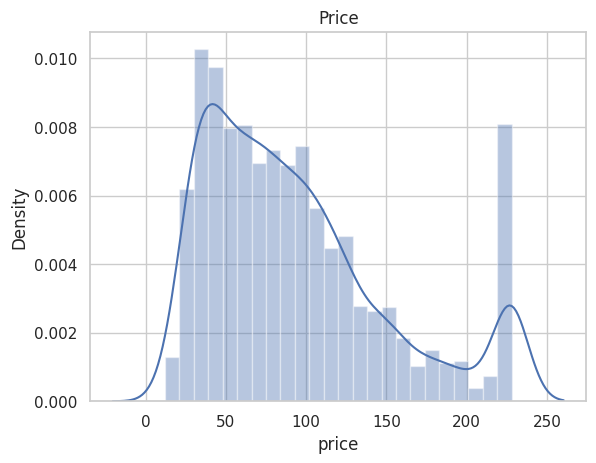

In [120]:
#Checking for Outliers in our target variable (price)
sns.boxplot(data['price'])
plt.xlabel("Price")
plt.ylabel("Values")
plt.show()

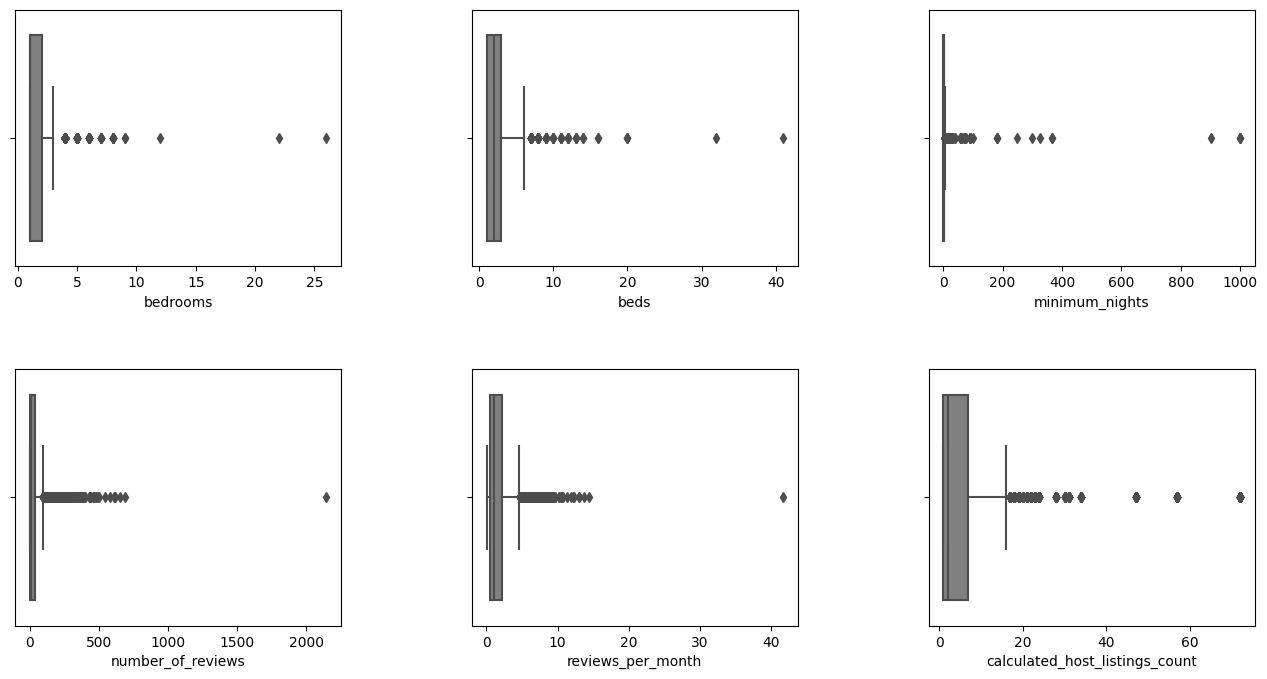

In [36]:
#Random Visualisation for Outliers
columns = ["bedrooms","beds","minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]
fig = plt.figure(facecolor='white', figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(columns):
    ax = fig.add_subplot(2, 3, num +1)
    ax = sns.boxplot(x=data[column_name], color='grey') #Copied

Boxplots above show the presence of outliers in multiple features

> Indented block

> Indented block

> Indented block

> Indented block

---











In [37]:
#Checking For Outliers in all columns, printing the values and treating them

In [121]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outlier(dataframe, col_name):
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

numerical_columns = data2.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_columns:
    print(col, check_outlier(data2, col))

host_response_rate True
host_acceptance_rate True
host_total_listings_count True
accommodates True
bathrooms_text True
bedrooms True
beds True
price True
minimum_nights True
maximum_nights False
availability_30 False
availability_60 False
availability_90 False
availability_365 False
number_of_reviews True
review_scores_rating True
review_scores_accuracy True
review_scores_cleanliness True
review_scores_checkin True
review_scores_communication True
review_scores_location True
review_scores_value True
calculated_host_listings_count True
reviews_per_month True


In [122]:
def outlier_thresholds(series, q1=0.25, q3=0.75):
    quartile1 = series.quantile(q1)
    quartile3 = series.quantile(q3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def treat_outliers_with_quantiles(series, lower_quantile=0.25, upper_quantile=0.75):
    lower_limit, upper_limit = outlier_thresholds(series, lower_quantile, upper_quantile)
    series = series.clip(lower=lower_limit, upper=upper_limit)
    return series

# Assuming 'data2' is your DataFrame
numerical_columns = data2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check for outliers in each numeric column and print the results
#for col in numerical_columns:
    #outlier_present = data2[col].apply(lambda x: (x > outlier_thresholds(data2[col])[1]) or (x < outlier_thresholds(data2[col])[0]))
   # print(f"{col}: {outlier_present.any()}")

# Treat outliers with quantiles (default: lower_quantile=0.25, upper_quantile=0.75)
for col in numerical_columns:
    data2[col] = treat_outliers_with_quantiles(data2[col])

# Print the DataFrame after treating outliers
print(data2)

      host_response_rate  host_acceptance_rate  host_total_listings_count  \
0                  100.0                  81.0                        3.0   
1                  100.0                  72.5                        6.0   
2                   92.5                  72.5                        1.0   
3                   92.5                 100.0                        1.0   
4                   92.5                  72.5                        2.0   
...                  ...                   ...                        ...   
4727               100.0                 100.0                        1.0   
4742               100.0                  98.0                        7.0   
4744               100.0                  98.0                        7.0   
4745               100.0                  98.0                        7.0   
4750               100.0                 100.0                        1.0   

      accommodates  bathrooms_text  bedrooms  beds  price  minimum_nights  

<ipython-input-122-a9b1dbad05cc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = treat_outliers_with_quantiles(data2[col])
<ipython-input-122-a9b1dbad05cc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = treat_outliers_with_quantiles(data2[col])
<ipython-input-122-a9b1dbad05cc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Replace columns in dataframe "listings" with columns from "data2" with treated outliers

In [123]:
#Check Price after treating outliers
sns.distplot(data2['price'])
plt.title("Price")
plt.show

<ipython-input-123-38f0dbbdf09e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['price'])


<function matplotlib.pyplot.show(close=None, block=None)>

In [124]:
# Specify the columns you want to update
numeric_columns_to_replace_in_listings = ['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates','bathrooms_text','bedrooms','beds','price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']

# Use .update() method
listings.update(data2[numeric_columns_to_replace_in_listings])


In [125]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0           within a day               100.0                  81.0   
1         within an hour               100.0                  72.5   
2                    Nil                92.5                  72.5   
3                    Nil                92.5                 100.0   
4                    Nil                92.5                  72.5   
...                  ...                 ...                   ...   
4727  within a few hours               100.0                 100.0   
4742      within an hour               100.0                  98.0   
4744      within an hour               100.0                  98.0   
4745      within an hour               100.0                  98.0   
4750      within an hour               100.0                 100.0   

     host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                    t                        3.0                    t   
1                    t                        6.0                    t   
2                    f                        1.0                    t   
3                    f                        1.0                    t   
4                    f                        2.0                    t   
...                ...                        ...                  ...   
4727                 f                        1.0                    t   
4742                 f                        7.0                    t   
4744                 f                        7.0                    t   
4745                 f                        7.0                    t   
4750                 f                        1.0                    t   

     host_identity_verified neighbourhood_group_cleansed  latitude  longitude  \
0                         t                      Salford  53.50114   -2.26429   
1                         t                     Trafford  53.42985   -2.34018   
2                         f                      Salford  53.48526   -2.34232   
3                         f                     Rochdale  53.56259   -2.21945   
4                         t                   Manchester  53.37601   -2.25162   
...                     ...                          ...       ...        ...   
4727                      t                   Manchester  53.48493   -2.22013   
4742                      t                     Tameside  53.47985   -2.16227   
4744                      t                     Tameside  53.48147   -2.16289   
4745                      t                     Tameside  53.48153   -2.16220   
4750                      t                      Salford  53.48535   -2.24969   

      ... review_scores_accuracy review_scores_cleanliness  \
0     ...                   4.93                      4.93   
1     ...                   5.00                      5.00   
2     ...                   4.25                      4.75   
3     ...                   5.00                      4.90   
4     ...                   4.69                      4.47   
...   ...                    ...                       ...   
4727  ...                   5.00                      5.00   
4742  ...                   5.00                      5.00   
4744  ...                   5.00                      5.00   
4745  ...                   5.00                      5.00   
4750  ...                   5.00                      5.00   

      review_scores_checkin  review_scores_communication  \
0                      4.98                         4.94   
1                      5.00                         5.00   
2                      4.67                         4.75   
3                      5.00                         5.00   
4                      4.82                         4.76   
...                     ...                          ...   
4727                   5.00                         5.00   
4742                   5.00                         4.50   
4744              

In [126]:
highest_value = listings['price'].max()

print("Highest value in the column:", highest_value)

Highest value in the column: 228.0


    EXPLORATORY DATA ANALYSIS

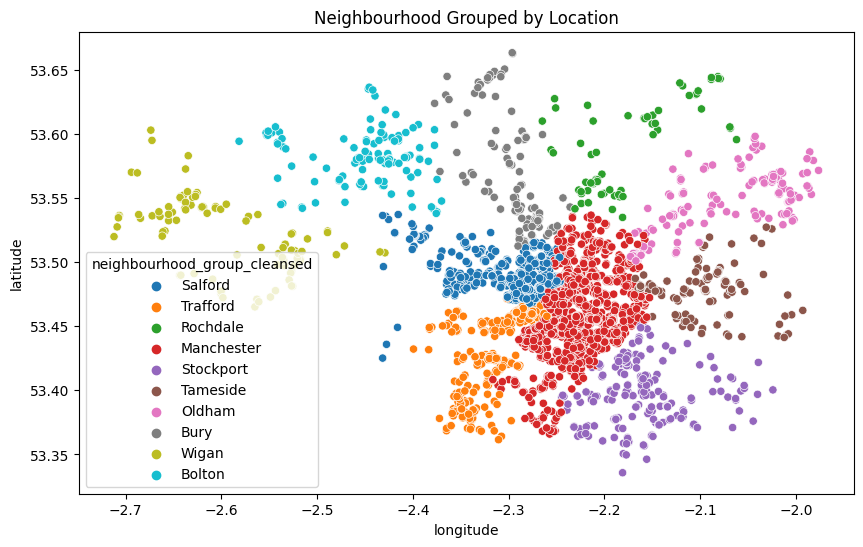

In [44]:
title = 'Neighbourhood Grouped by Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed', data=listings).set_title(title)
plt.ioff()

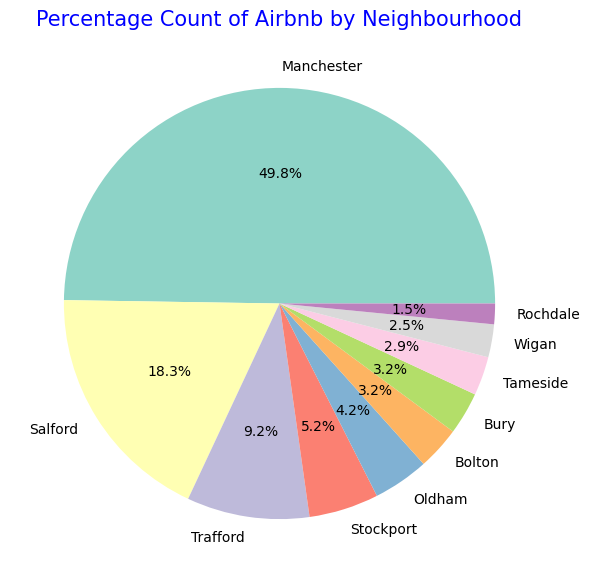

In [45]:
labels = listings.neighbourhood_group_cleansed.value_counts().index
sizes = listings.neighbourhood_group_cleansed.value_counts().values

# Generate a color palette from Seaborn
color_palette = sns.color_palette("Set3", len(labels))

plt.figure(0, figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=color_palette, autopct='%1.1f%%')
plt.title('Percentage Count of Airbnb by Neighbourhood', color='blue', fontsize=15)
plt.show()


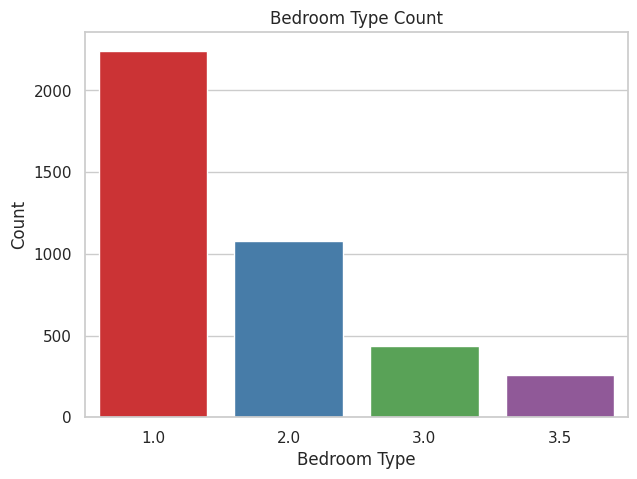

In [46]:
#Barchart showing Bedroom types and count
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
colors = sns.color_palette('Set1')
ax = sns.countplot(data=listings, x='bedrooms', palette=colors)
plt.title('Bedroom Type Count')
plt.xlabel('Bedroom Type')
plt.ylabel('Count')
plt.show()

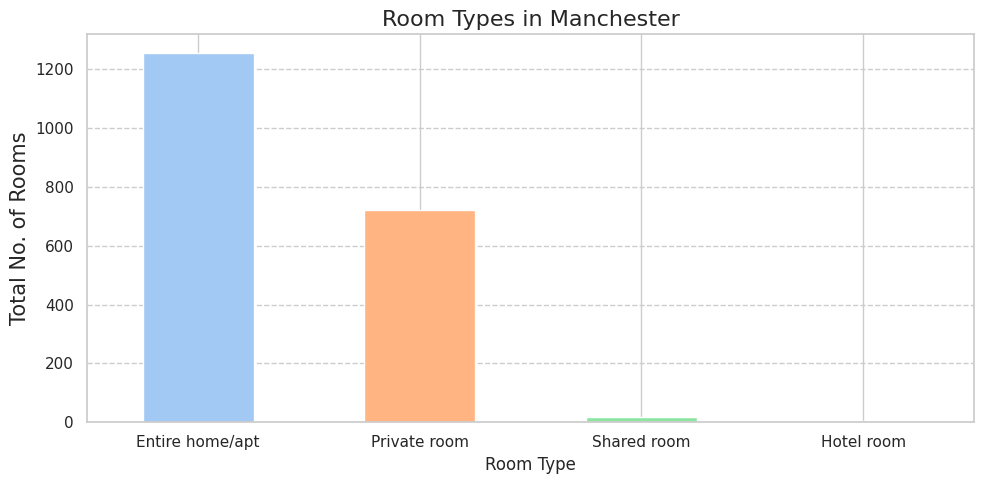

In [47]:
data = listings[listings['neighbourhood_group_cleansed'] =='Manchester']
apartmnt = data['room_type'].value_counts()

plt.figure(figsize=(10, 5))

# Prefered color to visualise
colors = sns.color_palette('pastel')

# Create the bar plot
apartmnt.plot(kind='bar', color=colors)

# Set plot title and axis labels
plt.title('Room Types in Manchester', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Total No. of Rooms', fontsize=15)

# Improve plot interphase
plt.xticks(rotation=0)
plt.tick_params(axis='x', which='both', bottom=False)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

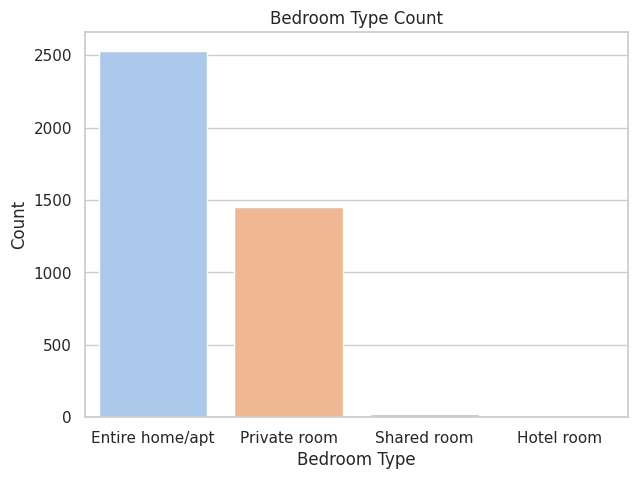

In [48]:
#Plot showing Room types in Greater Manchester
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=listings, x='room_type', palette="pastel")
plt.title('Bedroom Type Count')
plt.xlabel('Bedroom Type')
plt.ylabel('Count')
plt.show()

In [127]:
# Function to categorize sentiment
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment categorization
listings['sentiment'] = listings['compound_score'].apply(categorize_sentiment)

#print(listings)

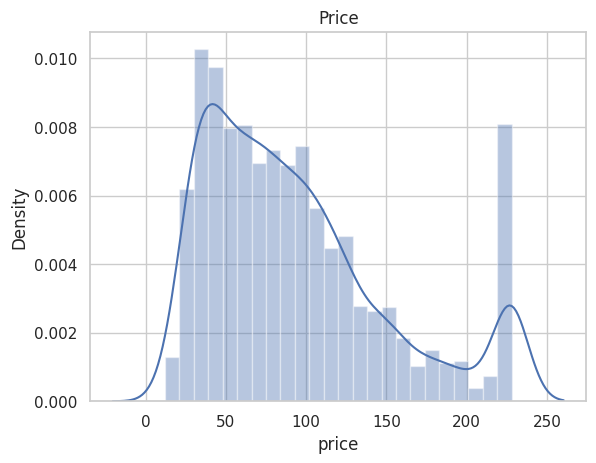

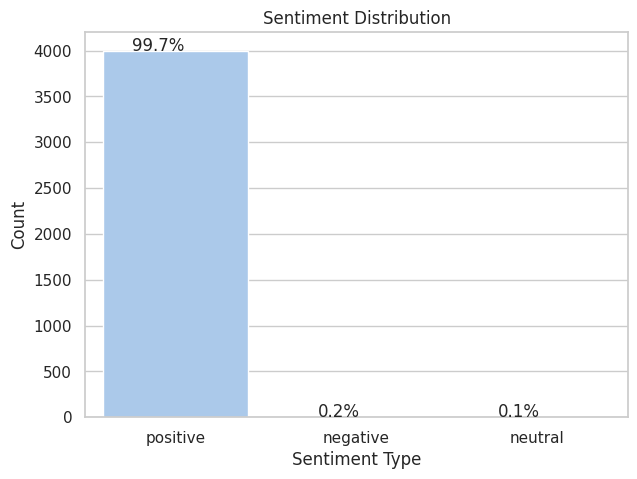

In [128]:
#Barchart showing sentiment distribution
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=listings, x='sentiment', palette="pastel")


# Calculate percentages
total = len(listings)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

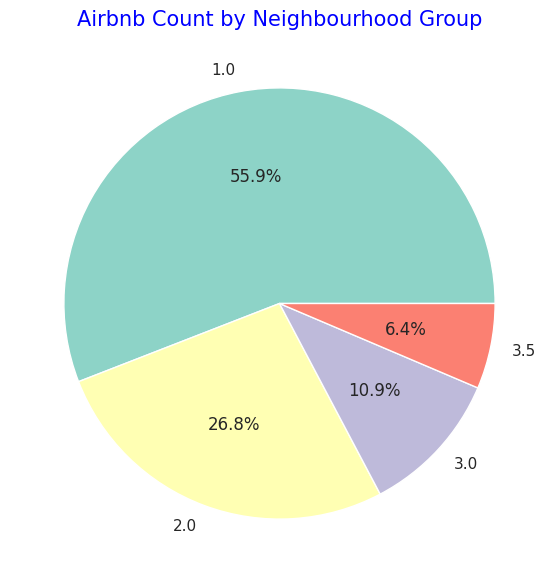

In [129]:
labels = listings.bedrooms.value_counts().index
sizes = listings.bedrooms.value_counts().values

# Automatically generate a color palette from Seaborn
color_palette = sns.color_palette("Set3", len(labels))

plt.figure(0, figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=color_palette, autopct='%1.1f%%')
plt.title('Airbnb Count by Neighbourhood Group', color='blue', fontsize=15)
plt.show()


WORKING WITH CATEGORICAL VARIABLES ----- ENCODINGS

Encoding Categorical Variables so they can be converted to Numerical/continous variable that can be used by Machine learning Algorithms

In [130]:
#Encoding Categorical host_is_superhost by mapping and not encoding since they contain either true or false
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0})
#Encoding Categorical host_has_profile_pic
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': 1, 'f': 0})
#Encoding Categorical host_identity_verified
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})
#Encoding Categorical has_availability
listings['has_availability'] = listings['has_availability'].map({'t': 1, 'f': 0})
#Encoding Categorical instant_bookable
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0})

In [131]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0           within a day               100.0                  81.0   
1         within an hour               100.0                  72.5   
2                    Nil                92.5                  72.5   
3                    Nil                92.5                 100.0   
4                    Nil                92.5                  72.5   
...                  ...                 ...                   ...   
4727  within a few hours               100.0                 100.0   
4742      within an hour               100.0                  98.0   
4744      within an hour               100.0                  98.0   
4745      within an hour               100.0                  98.0   
4750      within an hour               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified neighbourhood_group_cleansed  latitude  \
0                          1                      Salford  53.50114   
1                          1                     Trafford  53.42985   
2                          0                      Salford  53.48526   
3                          0                     Rochdale  53.56259   
4                          1                   Manchester  53.37601   
...                      ...                          ...       ...   
4727                       1                   Manchester  53.48493   
4742                       1                     Tameside  53.47985   
4744                       1                     Tameside  53.48147   
4745                       1                     Tameside  53.48153   
4750                       1                      Salford  53.48535   

      longitude  ... review_scores_cleanliness review_scores_checkin  \
0      -2.26429  ...                      4.93                  4.98   
1      -2.34018  ...                      5.00                  5.00   
2      -2.34232  ...                      4.75                  4.67   
3      -2.21945  ...                      4.90                  5.00   
4      -2.25162  ...                      4.47                  4.82   
...         ...  ...                       ...                   ...   
4727   -2.22013  ...                      5.00                  5.00   
4742   -2.16227  ...                      5.00                  5.00   
4744   -2.16289  ...                      5.00                  5.00   
4745   -2.16220  ...                      5.00                  5.00   
4750   -2.24969  ...                      5.00                  5.00   

      review_scores_communication  review_scores_location  \
0                            4.94                   4.660   
1                            5.00                   4.075   
2                            4.75                   4.075   
3                            5.00                   4.800   
4                            4.76                   4.810   
...                           ...                     ...   
4727                         5.00                   5.000   
4742                         4.50             

In [132]:
#Encoding Categorical host_response_time USING Ordinal Encoding -- Since the timing show some form of relationship e.g.ranking

In [135]:
response_mapping = {
    'Nil': 0,
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

In [136]:
listings['host_response_time'] = listings['host_response_time'].map(response_mapping)

In [137]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0                      3               100.0                  81.0   
1                      1               100.0                  72.5   
2                      0                92.5                  72.5   
3                      0                92.5                 100.0   
4                      0                92.5                  72.5   
...                  ...                 ...                   ...   
4727                   2               100.0                 100.0   
4742                   1               100.0                  98.0   
4744                   1               100.0                  98.0   
4745                   1               100.0                  98.0   
4750                   1               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified neighbourhood_group_cleansed  latitude  \
0                          1                      Salford  53.50114   
1                          1                     Trafford  53.42985   
2                          0                      Salford  53.48526   
3                          0                     Rochdale  53.56259   
4                          1                   Manchester  53.37601   
...                      ...                          ...       ...   
4727                       1                   Manchester  53.48493   
4742                       1                     Tameside  53.47985   
4744                       1                     Tameside  53.48147   
4745                       1                     Tameside  53.48153   
4750                       1                      Salford  53.48535   

      longitude  ... review_scores_cleanliness review_scores_checkin  \
0      -2.26429  ...                      4.93                  4.98   
1      -2.34018  ...                      5.00                  5.00   
2      -2.34232  ...                      4.75                  4.67   
3      -2.21945  ...                      4.90                  5.00   
4      -2.25162  ...                      4.47                  4.82   
...         ...  ...                       ...                   ...   
4727   -2.22013  ...                      5.00                  5.00   
4742   -2.16227  ...                      5.00                  5.00   
4744   -2.16289  ...                      5.00                  5.00   
4745   -2.16220  ...                      5.00                  5.00   
4750   -2.24969  ...                      5.00                  5.00   

      review_scores_communication  review_scores_location  \
0                            4.94                   4.660   
1                            5.00                   4.075   
2                            4.75                   4.075   
3                            5.00                   4.800   
4                            4.76                   4.810   
...                           ...                     ...   
4727                         5.00                   5.000   
4742                         4.50             

2 --- Encoding Neighborhood Group

In [138]:
#ENCODING NEIGHBORHOOD GROUP CLEANSED USING ONE-HOT-ENCODING (Since Data has low dimension (just 10 different neighborhoods)) and
# and data is nominal and not ordinal(no main relationship between the neighborhoods)

# Sample data
data = listings['neighbourhood_group_cleansed']

# Perform one-hot encoding
encoded_df = pd.get_dummies(data, prefix='neighbourhood_group')

# Merge with original DataFrame
listings = pd.concat([listings, encoded_df], axis=1)

# Drop original column
listings.drop('neighbourhood_group_cleansed', axis=1, inplace=True)


In [139]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0                      3               100.0                  81.0   
1                      1               100.0                  72.5   
2                      0                92.5                  72.5   
3                      0                92.5                 100.0   
4                      0                92.5                  72.5   
...                  ...                 ...                   ...   
4727                   2               100.0                 100.0   
4742                   1               100.0                  98.0   
4744                   1               100.0                  98.0   
4745                   1               100.0                  98.0   
4750                   1               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified  latitude  longitude  \
0                          1  53.50114   -2.26429   
1                          1  53.42985   -2.34018   
2                          0  53.48526   -2.34232   
3                          0  53.56259   -2.21945   
4                          1  53.37601   -2.25162   
...                      ...       ...        ...   
4727                       1  53.48493   -2.22013   
4742                       1  53.47985   -2.16227   
4744                       1  53.48147   -2.16289   
4745                       1  53.48153   -2.16220   
4750                       1  53.48535   -2.24969   

                          property_type  ... neighbourhood_group_Bolton  \
0                           Entire loft  ...                          0   
1                           Entire home  ...                          0   
2           Private room in rental unit  ...                          0   
3                  Private room in home  ...                          0   
4                  Private room in home  ...                          0   
...                                 ...  ...                        ...   
4727               Private room in home  ...                          0   
4742  Private room in bed and breakfast  ...                          0   
4744  Private room in bed and breakfast  ...                          0   
4745  Private room in bed and breakfast  ...                          0   
4750                 Entire rental unit  ...                          0   

      neighbourhood_group_Bury  neighbourhood_group_Manchester  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               1   
...                        ...                             ...   
4727                         0                               1   
4742                         0                               0   
4744                         0                               0   
4745                         0                        

In [140]:
listings.drop('sentiment', axis=1, inplace=True)

ENCODING PROPERTY TYPE

In [141]:
property_counts = listings['property_type'].value_counts() # Shows there are 56 distinct property_type categories
#property_counts

In [142]:
#Encoding Categorical variables property_type Using Binary Encoding since data because

#It Reduces dimensionality like label encoding but preserves more information.
# Encodes ordinal relationships between categories based on binary patterns.
#May perform better than label encoding for some models.

In [143]:
pip install category-encoders

In [144]:
import category_encoders as ce

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=['property_type'])

# Fit and transform the property_type column
listings = encoder.fit_transform(listings)

In [145]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0                      3               100.0                  81.0   
1                      1               100.0                  72.5   
2                      0                92.5                  72.5   
3                      0                92.5                 100.0   
4                      0                92.5                  72.5   
...                  ...                 ...                   ...   
4727                   2               100.0                 100.0   
4742                   1               100.0                  98.0   
4744                   1               100.0                  98.0   
4745                   1               100.0                  98.0   
4750                   1               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified  latitude  longitude  property_type_0  ...  \
0                          1  53.50114   -2.26429                0  ...   
1                          1  53.42985   -2.34018                0  ...   
2                          0  53.48526   -2.34232                0  ...   
3                          0  53.56259   -2.21945                0  ...   
4                          1  53.37601   -2.25162                0  ...   
...                      ...       ...        ...              ...  ...   
4727                       1  53.48493   -2.22013                0  ...   
4742                       1  53.47985   -2.16227                0  ...   
4744                       1  53.48147   -2.16289                0  ...   
4745                       1  53.48153   -2.16220                0  ...   
4750                       1  53.48535   -2.24969                0  ...   

      neighbourhood_group_Bolton  neighbourhood_group_Bury  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
...                          ...                       ...   
4727                           0                         0   
4742                           0                         0   
4744                           0                         0   
4745                           0                         0   
4750                           0                         0   

      neighbourhood_group_Manchester  neighbourhood_group_Oldham  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  1                           0   
...                              ...                         ...   
4727                               1                           0   
4742                               0                          

ENCODING ROOM TYPE

In [146]:
print(listings['room_type'].unique()) # Checking number of distinct categories in room_type

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [147]:
# Encoding Room type
data = listings['room_type']

# Perform one-hot encoding
encoded_df = pd.get_dummies(data, prefix='room_type')

# Merge with original DataFrame
listings = pd.concat([listings, encoded_df], axis=1)

# Drop original column
listings.drop('room_type', axis=1, inplace=True)


In [148]:
listz = listings

AMENITIES -- EXPLORING INDIVIDUAL AMENITIES

In [149]:
from collections import Counter
import ast

# Sample data
data = listz["amenities"]

# Convert data to a DataFrame
listz = pd.DataFrame(data, columns=['amenities'])

# Convert the strings back to lists using ast.literal_eval
listz['amenities'] = listz['amenities'].apply(ast.literal_eval)

# Explode the 'amenities' column to separate each item into a separate row
exploded_amenities = listz['amenities'].explode()

# Get the total count of each item using Counter
amenity_counts = Counter(exploded_amenities)

# Select the top 10 distinct amenities
top_10_amenities = [amenity for amenity, count in amenity_counts.most_common(10)]

# One-hot encode the top 10 distinct amenities
one_hot_encoded = pd.get_dummies(exploded_amenities[exploded_amenities.isin(top_10_amenities)])

# Reshape the one-hot encoded DataFrame
one_hot_encoded = one_hot_encoded.groupby(level=0).sum()

print(one_hot_encoded)


      Dishes and silverware  Essentials  Hair dryer  Hangers  Hot water  Iron  \
0                         1           1           1        1          1     1   
1                         1           1           1        1          1     1   
2                         0           1           0        1          0     1   
3                         0           1           1        1          1     1   
4                         1           1           1        1          1     1   
...                     ...         ...         ...      ...        ...   ...   
4727                      1           1           1        0          1     0   
4742                      0           0           1        0          0     1   
4744                      0           0           1        0          0     1   
4745                      0           0           1        0          0     1   
4750                      1           1           0        1          0     1   

      Kitchen  Refrigerator

In [150]:
top_10_amenities

['Smoke alarm',
 'Kitchen',
 'Essentials',
 'Wifi',
 'Iron',
 'Hangers',
 'Hot water',
 'Dishes and silverware',
 'Refrigerator',
 'Hair dryer']

In [151]:
# Merge with original DataFrame
listings = pd.concat([listings, one_hot_encoded], axis=1)
# Drop original column
listings.drop('amenities', axis=1, inplace=True)

In [152]:
listings

host_response_time  host_response_rate  host_acceptance_rate  \
0                      3               100.0                  81.0   
1                      1               100.0                  72.5   
2                      0                92.5                  72.5   
3                      0                92.5                 100.0   
4                      0                92.5                  72.5   
...                  ...                 ...                   ...   
4727                   2               100.0                 100.0   
4742                   1               100.0                  98.0   
4744                   1               100.0                  98.0   
4745                   1               100.0                  98.0   
4750                   1               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified  latitude  longitude  property_type_0  ...  \
0                          1  53.50114   -2.26429                0  ...   
1                          1  53.42985   -2.34018                0  ...   
2                          0  53.48526   -2.34232                0  ...   
3                          0  53.56259   -2.21945                0  ...   
4                          1  53.37601   -2.25162                0  ...   
...                      ...       ...        ...              ...  ...   
4727                       1  53.48493   -2.22013                0  ...   
4742                       1  53.47985   -2.16227                0  ...   
4744                       1  53.48147   -2.16289                0  ...   
4745                       1  53.48153   -2.16220                0  ...   
4750                       1  53.48535   -2.24969                0  ...   

      Dishes and silverware  Essentials  Hair dryer  Hangers  Hot water  Iron  \
0                       1.0         1.0         1.0      1.0        1.0   1.0   
1                       1.0         1.0         1.0      1.0        1.0   1.0   
2                       0.0         1.0         0.0      1.0        0.0   1.0   
3                       0.0         1.0         1.0      1.0        1.0   1.0   
4                       1.0         1.0         1.0      1.0        1.0   1.0   
...                     ...         ...         ...      ...        ...   ...   
4727                    1.0         1.0         1.0      0.0        1.0   0.0   
4742                    0.0         0.0         1.0      0.0        0.0   1.0   
4744                    0.0         0.0         1.0      0.0        0.0   1.0   
4745                    0.0         0.0         1.0      0.0        0.0   1.0   
4750                    1.0         1.0         0.0      1.0        0.0   1.0   

      Kitchen  Refrigerator  Smoke alarm  Wifi  
0         1.0           1.0          1.0   1.0  
1         1.0           1.0          1.0   1.0  
2         1.0           0.0          1.0   1.0  
3         1.0           0.0          1.0   1.0  
4         1.0           1.0          1.0   0.0  
...       ...           ...          ...   ...  
4727      1.0           1.0        

In [153]:
print("The dataset has {} rows and {} columns after encoding the top 10 amenities features.".format(*listings.shape))

The dataset has 4014 rows and 63 columns after encoding the top 10 amenities features.


In [154]:
#listings.to_csv('tryout1.csv')

In [155]:
sns.distplot(listings['price'])
plt.title("Price")
plt.show

<ipython-input-155-29965df48635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings['price'])


<function matplotlib.pyplot.show(close=None, block=None)>

In [156]:
#Pearson Correlation Map
plt.figure(figsize = (15, 12))
sns.heatmap(listings.corr(), annot = True)

<Axes: >

ENCODE categorical variables, Treat Outliers and Handle missing values before FEATURE SELECTION

In [157]:
data = listings

In [158]:
#USING RECURSIVE FEATURE ELIMINATION (RFE) for FEATURE SELECTION

In [159]:
data.isnull().sum()

host_response_time            0
host_response_rate            0
host_acceptance_rate          0
host_is_superhost             0
host_total_listings_count     0
                             ..
Iron                         10
Kitchen                      10
Refrigerator                 10
Smoke alarm                  10
Wifi                         10
Length: 63, dtype: int64

In [160]:
# Drop rows with any null values
data.dropna(inplace=True)

In [161]:
data

host_response_time  host_response_rate  host_acceptance_rate  \
0                      3               100.0                  81.0   
1                      1               100.0                  72.5   
2                      0                92.5                  72.5   
3                      0                92.5                 100.0   
4                      0                92.5                  72.5   
...                  ...                 ...                   ...   
4727                   2               100.0                 100.0   
4742                   1               100.0                  98.0   
4744                   1               100.0                  98.0   
4745                   1               100.0                  98.0   
4750                   1               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                     1                        3.0                     1   
1                     1                        6.0                     1   
2                     0                        1.0                     1   
3                     0                        1.0                     1   
4                     0                        2.0                     1   
...                 ...                        ...                   ...   
4727                  0                        1.0                     1   
4742                  0                        7.0                     1   
4744                  0                        7.0                     1   
4745                  0                        7.0                     1   
4750                  0                        1.0                     1   

      host_identity_verified  latitude  longitude  property_type_0  ...  \
0                          1  53.50114   -2.26429                0  ...   
1                          1  53.42985   -2.34018                0  ...   
2                          0  53.48526   -2.34232                0  ...   
3                          0  53.56259   -2.21945                0  ...   
4                          1  53.37601   -2.25162                0  ...   
...                      ...       ...        ...              ...  ...   
4727                       1  53.48493   -2.22013                0  ...   
4742                       1  53.47985   -2.16227                0  ...   
4744                       1  53.48147   -2.16289                0  ...   
4745                       1  53.48153   -2.16220                0  ...   
4750                       1  53.48535   -2.24969                0  ...   

      Dishes and silverware  Essentials  Hair dryer  Hangers  Hot water  Iron  \
0                       1.0         1.0         1.0      1.0        1.0   1.0   
1                       1.0         1.0         1.0      1.0        1.0   1.0   
2                       0.0         1.0         0.0      1.0        0.0   1.0   
3                       0.0         1.0         1.0      1.0        1.0   1.0   
4                       1.0         1.0         1.0      1.0        1.0   1.0   
...                     ...         ...         ...      ...        ...   ...   
4727                    1.0         1.0         1.0      0.0        1.0   0.0   
4742                    0.0         0.0         1.0      0.0        0.0   1.0   
4744                    0.0         0.0         1.0      0.0        0.0   1.0   
4745                    0.0         0.0         1.0      0.0        0.0   1.0   
4750                    1.0         1.0         0.0      1.0        0.0   1.0   

      Kitchen  Refrigerator  Smoke alarm  Wifi  
0         1.0           1.0          1.0   1.0  
1         1.0           1.0          1.0   1.0  
2         1.0           0.0          1.0   1.0  
3         1.0           0.0          1.0   1.0  
4         1.0           1.0          1.0   0.0  
...       ...           ...          ...   ...  
4727      1.0           1.0        

In [162]:
data.isnull().sum()

host_response_time           0
host_response_rate           0
host_acceptance_rate         0
host_is_superhost            0
host_total_listings_count    0
                            ..
Iron                         0
Kitchen                      0
Refrigerator                 0
Smoke alarm                  0
Wifi                         0
Length: 63, dtype: int64

In [163]:
print(data.dtypes)

host_response_time             int64
host_response_rate           float64
host_acceptance_rate         float64
host_is_superhost              int64
host_total_listings_count    float64
                              ...   
Iron                         float64
Kitchen                      float64
Refrigerator                 float64
Smoke alarm                  float64
Wifi                         float64
Length: 63, dtype: object


In [164]:
pip install xgboost

In [165]:
#SCALING AND MODELLING MODELING
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler #To scale/standardize your data
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsRegressor

In [84]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00


In [166]:
from catboost import CatBoostRegressor

In [167]:
from sklearn.feature_selection import RFECV #Recursive Feature Elimination with Cross-Validation
from sklearn.model_selection import KFold

Standardization Process # Scaling Data

In [168]:
num_cols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count','latitude', 'longitude','accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']

In [169]:
num_cols = [col for col in num_cols if col not in ["price"]]

In [170]:
scaler = RobustScaler()

In [171]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [172]:
data.head(10)

host_response_time  host_response_rate  host_acceptance_rate  \
0                 2.0                 0.0             -1.545455   
1                 0.0                 0.0             -2.318182   
2                -1.0                -2.5             -2.318182   
3                -1.0                -2.5              0.181818   
4                -1.0                -2.5             -2.318182   
5                 1.0                 0.0             -2.318182   
6                 0.0                 0.0              0.181818   
7                 2.0                 0.0             -2.318182   
8                 0.0                 0.0             -1.545455   
9                 1.0                 0.0             -2.318182   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                  1                  -0.076923                     1   
1                  1                   0.153846                     1   
2                  0                  -0.230769                     1   
3                  0                  -0.230769                     1   
4                  0                  -0.153846                     1   
5                  0                   2.076923                     1   
6                  1                  -0.153846                     1   
7                  0                  -0.230769                     1   
8                  1                  -0.230769                     1   
9                  0                  -0.153846                     1   

   host_identity_verified  latitude  longitude  property_type_0  ...  \
0                       1  0.575964  -0.347277                0  ...   
1                       1 -1.238863  -1.488180                0  ...   
2                       0  0.171707  -1.520352                0  ...   
3                       0  2.140295   0.326831                0  ...   
4                       1 -2.609467  -0.156801                0  ...   
5                       1 -0.543124   0.412072                0  ...   
6                       1 -2.609721   2.955162                0  ...   
7                       1 -0.651826  -0.304882                0  ...   
8                       1  0.237895  -0.771677                0  ...   
9                       1 -0.421186  -1.688879                0  ...   

   Dishes and silverware  Essentials  Hair dryer  Hangers  Hot water  Iron  \
0                    1.0         1.0         1.0      1.0        1.0   1.0   
1                    1.0         1.0         1.0      1.0        1.0   1.0   
2                    0.0         1.0         0.0      1.0        0.0   1.0   
3                    0.0         1.0         1.0      1.0        1.0   1.0   
4                    1.0         1.0         1.0      1.0        1.0   1.0   
5                    0.0         0.0         0.0      0.0        0.0   0.0   
6                    1.0         1.0         1.0      1.0        1.0   1.0   
7                    1.0         1.0         1.0      1.0        1.0   1.0   
8                    1.0         1.0         1.0      1.0        1.0   1.0   
9                    0.0         0.0         1.0      1.0        1.0   1.0   

   Kitchen  Refrigerator  Smoke alarm  Wifi  
0      1.0           1.0          1.0   1.0  
1      1.0           1.0          1.0   1.0  
2      1.0           0.0          1.0   1.0  
3      1.0           0.0          1.0   1.0  
4      1.0           1.0          1.0   0.0  
5      1.0           0.0          0.0   0.0  
6      0.0           1.0          1.0   1.0  
7      1.0           1.0          1.0   1.0  
8      1.0           1.0          1.0   0.0  
9      1.0           0.0          1.0   1.0  

[10 rows x 63 columns]

In [238]:
# Step 2: Split data into features/independent and target/dependent
X = data.drop(['price'], axis=1)  # Drop the target variable 'price'
y = data['price']

In [239]:
# Split data into training and testing sets
# Replace 'test_size' and 'random_state' with appropriate values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)


In [ ]:
#USING GRADIENT BOOSTING REGRESSOR

In [ ]:
estimator = GradientBoostingRegressor()

In [ ]:
#Perform feature selection with RFECV:
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5))

X_train_selected = rfecv.fit_transform(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.1, 0.5, 1],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator, param_grid, cv= 5, scoring='neg_mean_squared_error', return_train_score = True)

In [ ]:
# Fit grid searchCV on selected features
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
#Apply to test data

In [ ]:
# Fit grid search
grid_search.fit(X_train, y_train)

# Get best estimator
best_estimator = grid_search.best_estimator_

# Predict on test set
y_pred = best_estimator.predict(X_test)

# Evaluate metrics
r2 = r2_score(y_test, y_pred)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.7306650914686725
MAE: 21.27452854067158
MSE: 890.9442815442529
RMSE: 29.848689779356363


In [ ]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


1. host_response_time (rank: 1)
2. availability_90 (rank: 2)
3. availability_365 (rank: 3)
4. number_of_reviews (rank: 4)
5. review_scores_rating (rank: 5)
6. review_scores_accuracy (rank: 6)
7. review_scores_cleanliness (rank: 7)
8. review_scores_communication (rank: 8)
9. review_scores_location (rank: 9)
10. review_scores_value (rank: 10)
11. calculated_host_listings_count (rank: 11)
12. reviews_per_month (rank: 12)
13. compound_score (rank: 13)
14. neighbourhood_group_Trafford (rank: 14)
15. neighbourhood_group_Wigan (rank: 15)
16. room_type_Entire home/apt (rank: 16)
17. room_type_Private room (rank: 17)
18. Dishes and silverware (rank: 18)
19. Hair dryer (rank: 19)
20. Hot water (rank: 20)
21. availability_60 (rank: 21)
22. availability_30 (rank: 22)
23. review_scores_checkin (rank: 23)
24. maximum_nights (rank: 24)
25. host_total_listings_count (rank: 25)
26. host_acceptance_rate (rank: 26)
27. latitude (rank: 27)
28. property_type_0 (rank: 28)
29. property_type_2 (rank: 29)
30. 

In [ ]:
# Get total number of selected features
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 38


In [240]:
#USING LINEAR REGRESSION

In [241]:
from sklearn.pipeline import Pipeline

In [242]:
model = LinearRegression()

In [243]:
# Create pipeline with RFECV and LinearRegression
pipe = Pipeline([('rfecv', RFECV(LinearRegression())),
                 ('model', LinearRegression())])

# Parameter grid for tuning RFECV
param_grid = {'rfecv__step': [1, 2],
              'rfecv__cv': [5, 10]}

# Grid search over pipeline
gs = GridSearchCV(pipe, param_grid, cv=5)
gs.fit(X_train, y_train)

# Extract best model from pipeline
best_model = gs.best_estimator_.named_steps['model']

# Apply RFECV transform to test data
X_test_transformed = gs.best_estimator_.named_steps['rfecv'].transform(X_test)

# Evaluate model on test data
y_pred = best_model.predict(X_test_transformed)

In [244]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [245]:
print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.6203649452648858
MAE: 26.159975557856217
MSE: 1255.810778240237
RMSE: 35.437420592365875


In [246]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

1. Wifi (rank: 1)
2. Smoke alarm (rank: 2)
3. Hot water (rank: 3)
4. review_scores_location (rank: 4)
5. review_scores_value (rank: 5)
6. instant_bookable (rank: 6)
7. calculated_host_listings_count (rank: 7)
8. reviews_per_month (rank: 8)
9. compound_score (rank: 9)
10. neighbourhood_group_Bolton (rank: 10)
11. neighbourhood_group_Bury (rank: 11)
12. neighbourhood_group_Manchester (rank: 12)
13. review_scores_cleanliness (rank: 13)
14. neighbourhood_group_Oldham (rank: 14)
15. neighbourhood_group_Salford (rank: 15)
16. neighbourhood_group_Stockport (rank: 16)
17. neighbourhood_group_Tameside (rank: 17)
18. neighbourhood_group_Trafford (rank: 18)
19. neighbourhood_group_Wigan (rank: 19)
20. room_type_Entire home/apt (rank: 20)
21. room_type_Hotel room (rank: 21)
22. room_type_Private room (rank: 22)
23. room_type_Shared room (rank: 23)
24. Dishes and silverware (rank: 24)
25. Essentials (rank: 25)
26. neighbourhood_group_Rochdale (rank: 26)
27. review_scores_accuracy (rank: 27)
28. rev

In [247]:
# Get total number of selected features
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 56


In [ ]:
#USING RANDOM FOREST REGRESSOR

In [248]:
model = RandomForestRegressor()

In [249]:
rfecv = RFECV(model, step=1, cv=StratifiedKFold(5))
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [250]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [251]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [252]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [253]:
# Get the best hyperparameters
best_parameters = grid_search.best_params_

In [254]:
print("Best Hyperparameters:", best_parameters)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [255]:
print("R2 of RFR:", r2)
print("MAE of RFR:", mae)
print("MSE of RFR:", mse)
print("RMSE of RFR:", rmse)

R2 of RFR: 0.6746569712814887
MAE of RFR: 22.992893882646687
MSE of RFR: 1076.2158999650437
RMSE of RFR: 32.805729681947994


In [256]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


1. host_response_time (rank: 1)
2. availability_60 (rank: 2)
3. availability_90 (rank: 3)
4. availability_365 (rank: 4)
5. number_of_reviews (rank: 5)
6. review_scores_rating (rank: 6)
7. review_scores_accuracy (rank: 7)
8. review_scores_cleanliness (rank: 8)
9. review_scores_communication (rank: 9)
10. review_scores_location (rank: 10)
11. review_scores_value (rank: 11)
12. calculated_host_listings_count (rank: 12)
13. reviews_per_month (rank: 13)
14. compound_score (rank: 14)
15. room_type_Entire home/apt (rank: 15)
16. room_type_Private room (rank: 16)
17. Dishes and silverware (rank: 17)
18. Hot water (rank: 18)
19. availability_30 (rank: 19)
20. maximum_nights (rank: 20)
21. review_scores_checkin (rank: 21)
22. host_total_listings_count (rank: 22)
23. beds (rank: 23)
24. bedrooms (rank: 24)
25. bathrooms_text (rank: 25)
26. accommodates (rank: 26)
27. property_type_3 (rank: 27)
28. property_type_2 (rank: 28)
29. host_acceptance_rate (rank: 29)
30. minimum_nights (rank: 30)
31. pro

In [257]:
# Get total number of selected features
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 34


In [258]:
#USING CatBoostRegressor

In [259]:
model = CatBoostRegressor()

In [260]:
rfecv = RFECV(model, step=1, cv=5)
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)

Streaming output truncated to the last 5000 lines.
4:	learn: 51.2166458	total: 22.9ms	remaining: 4.55s
5:	learn: 50.2182154	total: 28.2ms	remaining: 4.67s
6:	learn: 49.2682401	total: 32.6ms	remaining: 4.62s
7:	learn: 48.4299344	total: 36.7ms	remaining: 4.55s
8:	learn: 47.6551164	total: 40.9ms	remaining: 4.5s
9:	learn: 46.8173959	total: 48.4ms	remaining: 4.79s
10:	learn: 46.1558810	total: 53.3ms	remaining: 4.79s
11:	learn: 45.5669966	total: 58.2ms	remaining: 4.79s
12:	learn: 44.8842281	total: 63.2ms	remaining: 4.8s
13:	learn: 44.2108649	total: 69.4ms	remaining: 4.89s
14:	learn: 43.6723590	total: 74.9ms	remaining: 4.92s
15:	learn: 43.1850025	total: 79ms	remaining: 4.86s
16:	learn: 42.7098836	total: 83.2ms	remaining: 4.81s
17:	learn: 42.2244449	total: 92.9ms	remaining: 5.07s
18:	learn: 41.8268063	total: 106ms	remaining: 5.46s
19:	learn: 41.4272592	total: 110ms	remaining: 5.39s
20:	learn: 41.0544251	total: 114ms	remaining: 5.32s
21:	learn: 40.6169546	total: 118ms	remaining: 5.26s
22:	learn

In [261]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5],
    'l2_leaf_reg': [1, 5, 10]
}

In [262]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 47.5435958	total: 17.9ms	remaining: 17.9s
1:	learn: 41.8725419	total: 34.7ms	remaining: 17.3s
2:	learn: 39.0641548	total: 52.7ms	remaining: 17.5s
3:	learn: 36.8857933	total: 69.3ms	remaining: 17.3s
4:	learn: 35.1073456	total: 84.1ms	remaining: 16.7s
5:	learn: 34.2875609	total: 101ms	remaining: 16.8s
6:	learn: 33.3912574	total: 119ms	remaining: 16.9s
7:	learn: 32.2832640	total: 135ms	remaining: 16.7s
8:	learn: 31.4131413	total: 154ms	remaining: 16.9s
9:	learn: 30.8115099	total: 175ms	remaining: 17.3s
10:	learn: 30.1601294	total: 198ms	remaining: 17.8s
11:	learn: 29.7232186	total: 225ms	remaining: 18.5s
12:	learn: 29.1245351	total: 250ms	remaining: 19s
13:	learn: 28.5192852	total: 271ms	remaining: 19.1s
14:	learn: 28.1444819	total: 295ms	remaining: 19.4s
15:	learn: 27.4919690	total: 318ms	remaining: 19.6s
16:	learn: 27.0626811	total: 340ms	remaining: 19.7s
17:	learn: 26.7071441	total: 364ms	remaining: 19.8s
18:	learn: 26.136324

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7a260e1a9fc0>,
             param_grid={'depth': [4, 6, 8], 'l2_leaf_reg': [1, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5]})

In [263]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

In [264]:
# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

Best Hyperparameters: {'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [265]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [266]:
print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.7327733100639466
MAE: 20.90927727760356
MSE: 883.9704165077933
RMSE: 29.731639990215697


In [267]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

Streaming output truncated to the last 5000 lines.
66:	learn: 33.1099357	total: 325ms	remaining: 4.52s
67:	learn: 33.0190486	total: 329ms	remaining: 4.51s
68:	learn: 32.9369862	total: 333ms	remaining: 4.49s
69:	learn: 32.8579903	total: 337ms	remaining: 4.48s
70:	learn: 32.7843286	total: 341ms	remaining: 4.47s
71:	learn: 32.7049611	total: 346ms	remaining: 4.46s
72:	learn: 32.6573577	total: 350ms	remaining: 4.44s
73:	learn: 32.5973740	total: 354ms	remaining: 4.43s
74:	learn: 32.5104597	total: 358ms	remaining: 4.42s
75:	learn: 32.4132418	total: 362ms	remaining: 4.4s
76:	learn: 32.3172854	total: 366ms	remaining: 4.39s
77:	learn: 32.2576497	total: 371ms	remaining: 4.38s
78:	learn: 32.1782330	total: 375ms	remaining: 4.37s
79:	learn: 32.0892268	total: 379ms	remaining: 4.36s
80:	learn: 32.0294570	total: 383ms	remaining: 4.35s
81:	learn: 31.9651224	total: 387ms	remaining: 4.34s
82:	learn: 31.9119296	total: 391ms	remaining: 4.32s
83:	learn: 31.8486789	total: 395ms	remaining: 4.31s
84:	learn: 31.

In [268]:
# Get total number of selected features fror CatBoost
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 55


In [269]:
#USING XGBRegressor

In [270]:
model = XGBRegressor()

In [271]:
rfecv = RFECV(model, step=1, cv=5)
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)

In [272]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.1, 0.5, 1],
}

In [273]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [100, 500, 1000]})

In [274]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

In [275]:
# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [276]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [277]:
print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.7228185756609335
MAE: 21.362140382869114
MSE: 916.9001014826047
RMSE: 30.28035834468616


In [278]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

1. host_response_time (rank: 1)
2. Smoke alarm (rank: 2)
3. review_scores_communication (rank: 3)
4. review_scores_location (rank: 4)
5. review_scores_value (rank: 5)
6. instant_bookable (rank: 6)
7. calculated_host_listings_count (rank: 7)
8. reviews_per_month (rank: 8)
9. compound_score (rank: 9)
10. neighbourhood_group_Bolton (rank: 10)
11. neighbourhood_group_Bury (rank: 11)
12. neighbourhood_group_Manchester (rank: 12)
13. review_scores_cleanliness (rank: 13)
14. neighbourhood_group_Rochdale (rank: 14)
15. neighbourhood_group_Trafford (rank: 15)
16. room_type_Entire home/apt (rank: 16)
17. room_type_Private room (rank: 17)
18. Dishes and silverware (rank: 18)
19. Essentials (rank: 19)
20. Hair dryer (rank: 20)
21. Hangers (rank: 21)
22. Hot water (rank: 22)
23. Iron (rank: 23)
24. Kitchen (rank: 24)
25. Refrigerator (rank: 25)
26. neighbourhood_group_Salford (rank: 26)
27. review_scores_accuracy (rank: 27)
28. review_scores_checkin (rank: 28)
29. number_of_reviews (rank: 29)
30. h

In [279]:
# Get total number of selected features
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 54


In [281]:
#USING LIGHTGBM REGRESSOR

In [282]:
import lightgbm as lgb

In [284]:
model = lgb.LGBMRegressor()

In [285]:
rfecv = RFECV(model, step=1, cv=5)
X_train_selected = rfecv.fit_transform(X_train, y_train)
X_test_selected = rfecv.transform(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 2562, number of used features: 59
[LightGBM] [Info] Start training from score 92.935597
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 2562, number of used features: 59
[LightGBM] [Info] Start training from score 92.935597
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

In [286]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'num_leaves': [20, 50, 100],
}

In [287]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [20, 50, 100]})

In [288]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

In [289]:
# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 50}


In [290]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [291]:
print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.7207374104802448
MAE: 21.174902759418075
MSE: 923.7844753901485
RMSE: 30.393822980831953


In [292]:
# Get the feature names
feature_names = X_train.columns

# Fit RFECV and get ranks
rfecv.fit(X_train, y_train)
ranks = np.argsort(rfecv.ranking_)

# Iterate through ranks and print info
for rank, feature_idx in enumerate(ranks):
    feature_name = feature_names[feature_idx]
    print(f"{rank+1}. {feature_name} (rank: {rank+1})")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 2562, number of used features: 59
[LightGBM] [Info] Start training from score 92.935597
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 2562, number of used features: 59
[LightGBM] [Info] Start training from score 92.935597
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

In [293]:
# Get total number of selected features
n_features = rfecv.n_features_

print("Total features selected:", n_features)

Total features selected: 36


In [294]:
#The End